# Random Walk Metropolis - Hastings sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Suppose we have a Normally Distributed data containing 50,000 points as below.

In [2]:
data = np.random.normal(5, 6, 50000)

(array([1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 8.000e+00, 9.000e+00,
        1.000e+01, 3.000e+01, 4.100e+01, 6.100e+01, 1.150e+02, 1.500e+02,
        2.390e+02, 3.420e+02, 4.950e+02, 6.860e+02, 8.450e+02, 1.120e+03,
        1.355e+03, 1.724e+03, 2.046e+03, 2.453e+03, 2.627e+03, 2.809e+03,
        3.119e+03, 3.267e+03, 3.277e+03, 3.189e+03, 3.159e+03, 2.784e+03,
        2.646e+03, 2.362e+03, 2.014e+03, 1.675e+03, 1.343e+03, 1.093e+03,
        8.250e+02, 6.210e+02, 4.690e+02, 3.460e+02, 2.410e+02, 1.420e+02,
        8.500e+01, 6.800e+01, 4.000e+01, 3.100e+01, 1.700e+01, 7.000e+00,
        9.000e+00, 1.000e+00]),
 array([-20.94429316, -19.96212169, -18.97995023, -17.99777877,
        -17.0156073 , -16.03343584, -15.05126438, -14.06909291,
        -13.08692145, -12.10474999, -11.12257853, -10.14040706,
         -9.1582356 ,  -8.17606414,  -7.19389267,  -6.21172121,
         -5.22954975,  -4.24737829,  -3.26520682,  -2.28303536,
         -1.3008639 ,  -0.31869243,   0.66347903,   1.64

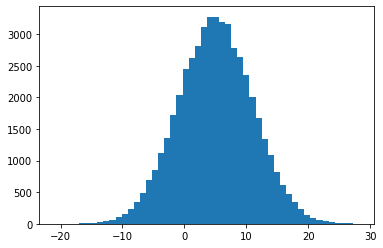

In [3]:
plt.hist(data, bins = 50 )

But suppose we have access only to random 2000 samples from this data

In [4]:
obs = np.random.permutation(data)[:2000]

(array([  1.,   1.,   0.,   0.,   0.,   4.,   2.,   2.,   3.,   1.,  12.,
         14.,  14.,  19.,  25.,  30.,  36.,  51.,  69.,  53.,  76.,  82.,
         86.,  89.,  71.,  97., 111., 105., 115., 102., 106., 101.,  80.,
         79.,  76.,  49.,  59.,  35.,  39.,  23.,  15.,  21.,  12.,  12.,
          4.,  11.,   1.,   2.,   3.,   1.]),
 array([-17.19848835, -16.39188235, -15.58527635, -14.77867035,
        -13.97206435, -13.16545835, -12.35885235, -11.55224635,
        -10.74564035,  -9.93903435,  -9.13242835,  -8.32582235,
         -7.51921634,  -6.71261034,  -5.90600434,  -5.09939834,
         -4.29279234,  -3.48618634,  -2.67958034,  -1.87297434,
         -1.06636834,  -0.25976234,   0.54684366,   1.35344966,
          2.16005566,   2.96666166,   3.77326766,   4.57987366,
          5.38647966,   6.19308566,   6.99969166,   7.80629766,
          8.61290366,   9.41950966,  10.22611566,  11.03272166,
         11.83932766,  12.64593366,  13.45253966,  14.25914567,
         15.065751

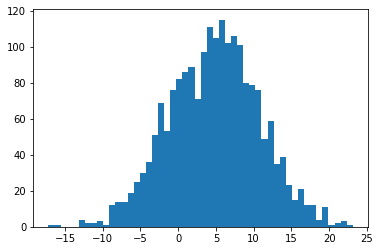

In [5]:
plt.hist(obs, bins = 50)

Thus, our task now is to find the distribution of our belief of what the variance(or just sigma) might be for the original data, given this observed data.

We will only try to find distribution for $\sigma$ not for $\mu$, even though one can do both.

Denoting the observed data as $D$.

We need $P(\sigma | D)$.

Using Bayes' Rule.

$\begin{equation*} P(\sigma | D) = \frac{P(D | \sigma)P(\sigma)}{\int P(D | \sigma)P(\sigma) d\sigma}  \end{equation*}$

Where, $P(D | \sigma)$ is the Likelihood of the data, $P(\sigma)$ is our Prior Belief for $\sigma$ and $P(\sigma | D)$ is our Posterior Belief for $\sigma$ after observing the data $D$.

In [6]:
def Gaussian(x, mu=0, sig=1):
    return (1/(2*np.pi*sig**2)**0.5) * np.exp(-0.5 * ((x - mu) / sig)**2)

## Prior $P(\sigma)$

We will use a Normal with 0 mean and 256 variance to show our uncertainty in the mean 0 value.

In [94]:
mu_prior = 0
sig_prior = 16

In [95]:
def Prior(x):
    return Gaussian(x, mu_prior, sig_prior)

## Likelihood $P( D | \sigma  )$

Let us denote that the data might come from a Normal Distribution whose mean is 0 and S.D. 10

In [96]:
mu_likel = 0
sig_likel = 10

In [97]:
def Likelihood(x, sig_likel):
    return Gaussian(x, mu_likel, sig_likel)

In [98]:
Likelihood(1,1,)

0.24197072451914337

## Metropolis-Hastings Algortihm for calculating Posterior Distribution

We will take the proportional function $g(\theta)$ as the $Likelihood * Prior$

And we'll take the Proposal Distribution as a Normal Distribution with mean at previous paramter value, i.e.

$q(\theta^{*} | \theta_{i-1}) \sim N(\theta_{i-1}, \sigma^2)$

**Therefore, this becomes a Random Walk Metropolis-Hastings Sampler**


In [99]:
def ProposalSample(mu_prop, sig_prop = 6):
    return np.random.normal(mu_prop, sig_prop)

In [34]:
def RandomWalk_MH(obs, theta_init, proposal_sd = 4,n_iter = 1000):
    
    #theta_init : Initial Value of Theta (sigma in this case)

    #Initialize other variables
    post_samples = [0 for i in range(n_iter)]

    theta_prev = theta_init

    accepts = 0

    
    #Looping for each Iteration
    for i in range(n_iter):


        #Draw a candidate from Proposal Distribution
        theta_star = ProposalSample(theta_prev, proposal_sd)

        #Calculate g(theta_star) and g(theta_{i-1}); We will take logarithm for numerical stability

        ##For log(g(theta_star)) + log( q(theta_{i-1} | theta_star) )
        ##    - log(g(theta_{i-1})) - log( q(theta_star | theta_{i-1}) )
        log_alpha = np.sum( np.log(Likelihood(obs, theta_star)) ) + np.log( Prior(theta_star) ) - \
        (np.sum( np.log(Likelihood(obs, theta_prev)) ) + np.log( Prior(theta_prev) ))


        #Condition on log of alpha
    
        if log_alpha >= 0:
            theta_now = theta_star
            accepts +=1

        else:
            
            alpha = np.exp(log_alpha, dtype = np.float128)

            theta_now = np.random.choice([theta_star, theta_prev], p = [alpha, 1 - alpha])
            if theta_now == theta_star:
                accepts +=1

        post_samples[i] = theta_now
        theta_prev = theta_now
        
    return post_samples, accepts

In [113]:
posterior_samples, accepts = RandomWalk_MH(obs, 8, 0.05,4000)

### **Remember that smaller Proposal Distribution variance increases Acceptance Rate**

In [114]:
accepts

3504

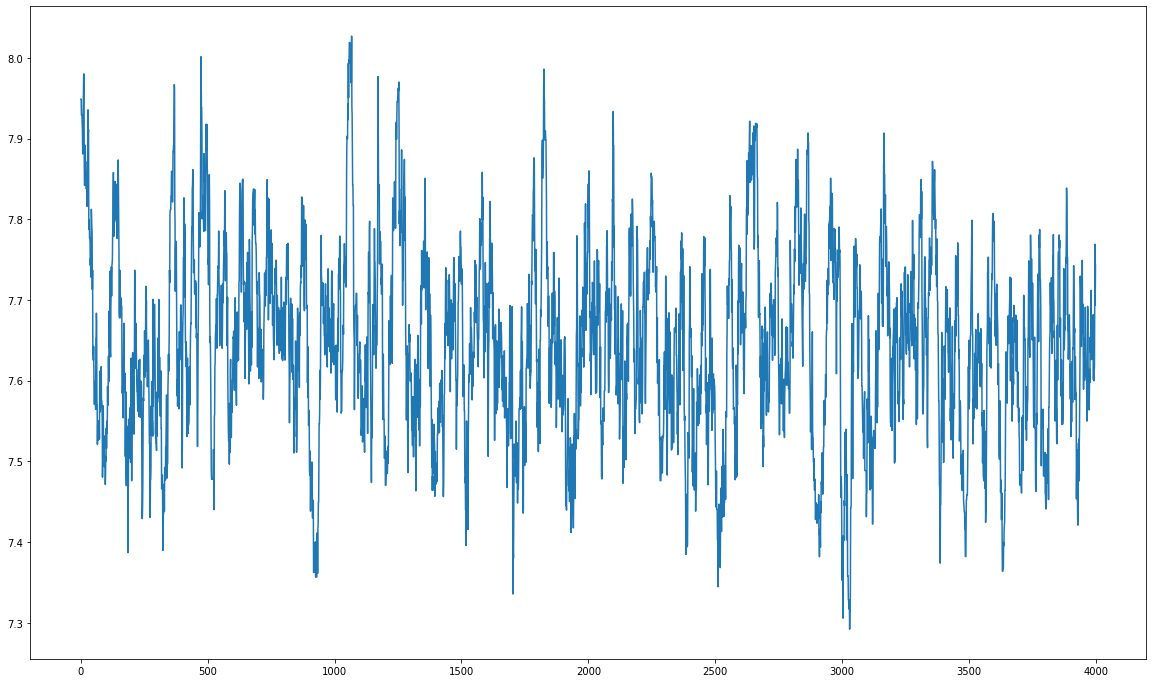

In [115]:
plt.figure(figsize = (20,12))
plt.plot(posterior_samples)

### The step sizes seem really small, therefore let's increase the Proposal variance by a bit.

In [116]:
posterior_samples, accepts = RandomWalk_MH(obs, 8, 0.3, 4000)

In [117]:
accepts

1728

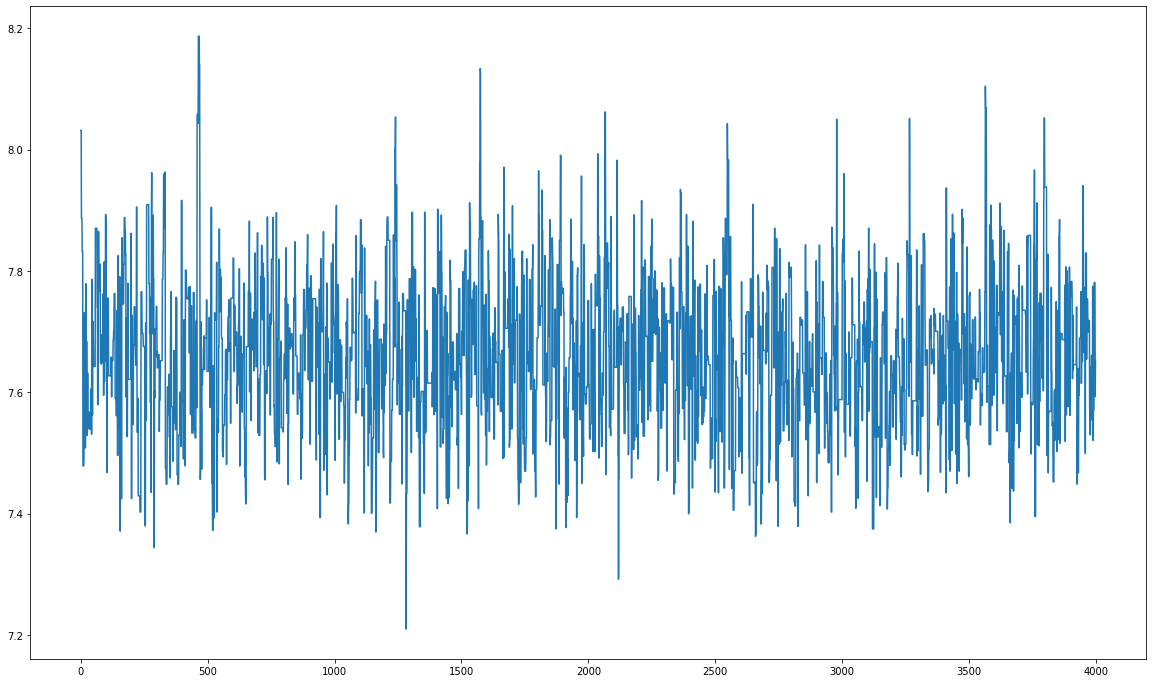

In [118]:
plt.figure(figsize = (20,12))
plt.plot(posterior_samples)

That is the right amount of Exploration and still getting stuck at times.

## Removing Burn-In Time

In [119]:
final_samples = posterior_samples[200:]

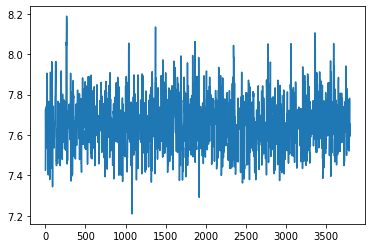

In [120]:
plt.plot(final_samples)

Seems Nice!

## Plotting Frequency Plot

(array([  1.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,  30.,  25.,  36.,
         49.,  77.,  58., 106., 108., 179., 120., 209., 218., 239., 230.,
        233., 251., 235., 212., 224., 177., 189., 127.,  95.,  82.,  78.,
         56.,  40.,  35.,   8.,  16.,  13.,  12.,   4.,   0.,   2.,  14.,
          0.,   1.,   1.,   3.,   0.,   4.]),
 array([7.20934941, 7.22890777, 7.24846613, 7.2680245 , 7.28758286,
        7.30714122, 7.32669959, 7.34625795, 7.36581631, 7.38537468,
        7.40493304, 7.4244914 , 7.44404977, 7.46360813, 7.48316649,
        7.50272486, 7.52228322, 7.54184158, 7.56139995, 7.58095831,
        7.60051667, 7.62007504, 7.6396334 , 7.65919176, 7.67875013,
        7.69830849, 7.71786685, 7.73742522, 7.75698358, 7.77654194,
        7.79610031, 7.81565867, 7.83521703, 7.8547754 , 7.87433376,
        7.89389212, 7.91345049, 7.93300885, 7.95256721, 7.97212558,
        7.99168394, 8.0112423 , 8.03080067, 8.05035903, 8.0699174 ,
        8.08947576, 8.10903412, 8.12859249, 8.

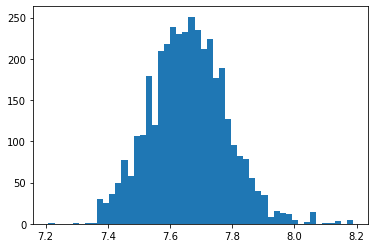

In [121]:
plt.hist(final_samples, bins = 50)

### To get a Singular Point Estimate of $\sigma$, we'll take MEAN of the Posterior Distribution.

In [122]:
sd = np.mean(final_samples)
sd

7.658769246611308

**The original S.D. was 6, and we got a prediction of 7.6587**

**Also, our prior belief regarding the sigma was around 0 but with very low certainty as variance was 256**

In [123]:
mu = np.mean(obs)
mu

4.788611916355409

## Final Predictions

In [124]:
x = np.linspace(-20, 30, 10000)

In [125]:
y = Gaussian(x, mu, sd)

(array([1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 8.000e+00, 9.000e+00,
        1.000e+01, 3.000e+01, 4.100e+01, 6.100e+01, 1.150e+02, 1.500e+02,
        2.390e+02, 3.420e+02, 4.950e+02, 6.860e+02, 8.450e+02, 1.120e+03,
        1.355e+03, 1.724e+03, 2.046e+03, 2.453e+03, 2.627e+03, 2.809e+03,
        3.119e+03, 3.267e+03, 3.277e+03, 3.189e+03, 3.159e+03, 2.784e+03,
        2.646e+03, 2.362e+03, 2.014e+03, 1.675e+03, 1.343e+03, 1.093e+03,
        8.250e+02, 6.210e+02, 4.690e+02, 3.460e+02, 2.410e+02, 1.420e+02,
        8.500e+01, 6.800e+01, 4.000e+01, 3.100e+01, 1.700e+01, 7.000e+00,
        9.000e+00, 1.000e+00]),
 array([-20.94429316, -19.96212169, -18.97995023, -17.99777877,
        -17.0156073 , -16.03343584, -15.05126438, -14.06909291,
        -13.08692145, -12.10474999, -11.12257853, -10.14040706,
         -9.1582356 ,  -8.17606414,  -7.19389267,  -6.21172121,
         -5.22954975,  -4.24737829,  -3.26520682,  -2.28303536,
         -1.3008639 ,  -0.31869243,   0.66347903,   1.64

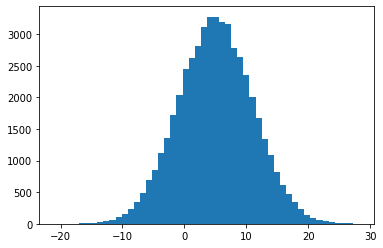

In [126]:
plt.hist([data], bins = 50)

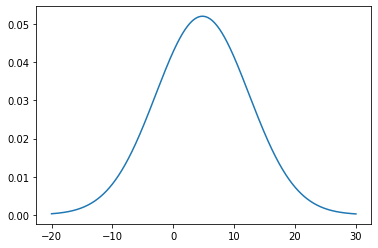

In [127]:
plt.plot(x,y)

Comparing both of them

In [128]:
values = np.random.normal(mu, np.abs(sd), 50000)

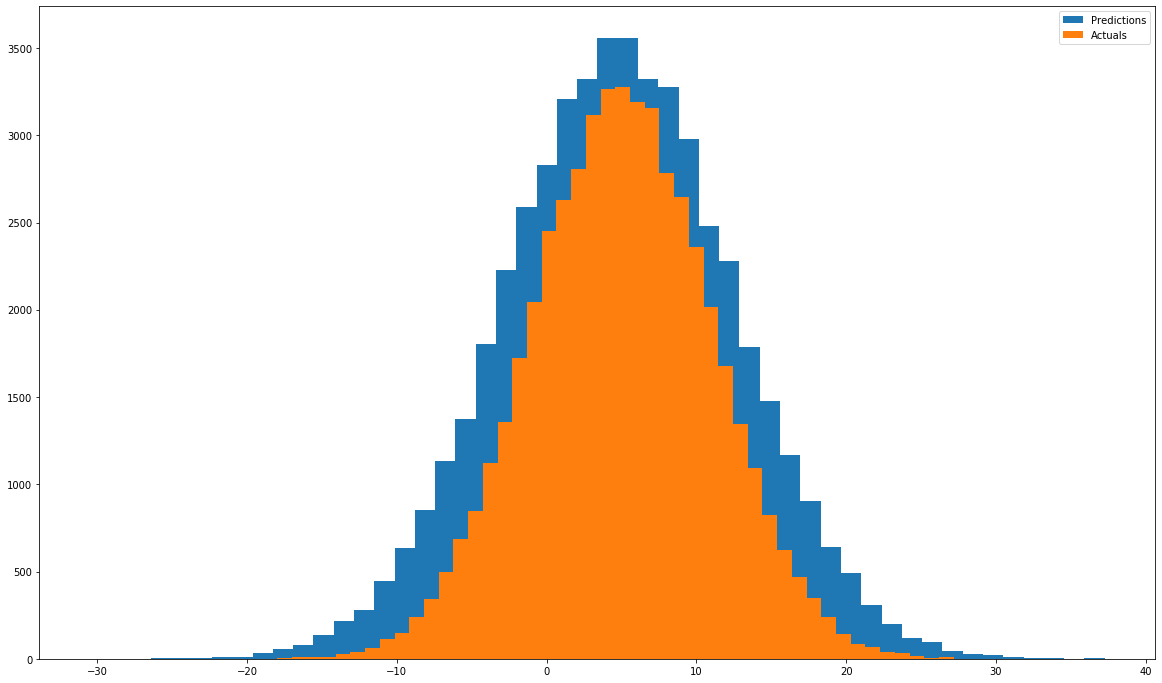

In [132]:
plt.figure(figsize=(20,12))
plt.hist([values], bins = 50, label = ["Predictions"])
plt.hist(data, bins = 50, label = "Actuals")
plt.legend()